In [1]:
import scIB
import scanpy as sc
import anndata as ad
import copy
import pickle
import os


In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save=400)
cwd = os.getcwd()
cwd

'/mnt/znas/icb_zstore01/groups/ce01/workspace/Benchmarking_data_integration/notebooks/integration'

# Read the data

In [3]:
#finput="../../data/brain_atac_fang_10x/merge_10x_CEMBA180312_3B_bin_merged_filterRowCol_filterCountCell_regression.h5ad"
finput="../../data/brain_atac_3datasets/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol_regression.h5ad"

adata = ad.read(finput)

In [4]:
adata

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes', 'counts'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'
    uns: 'batchname_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

# Before integration

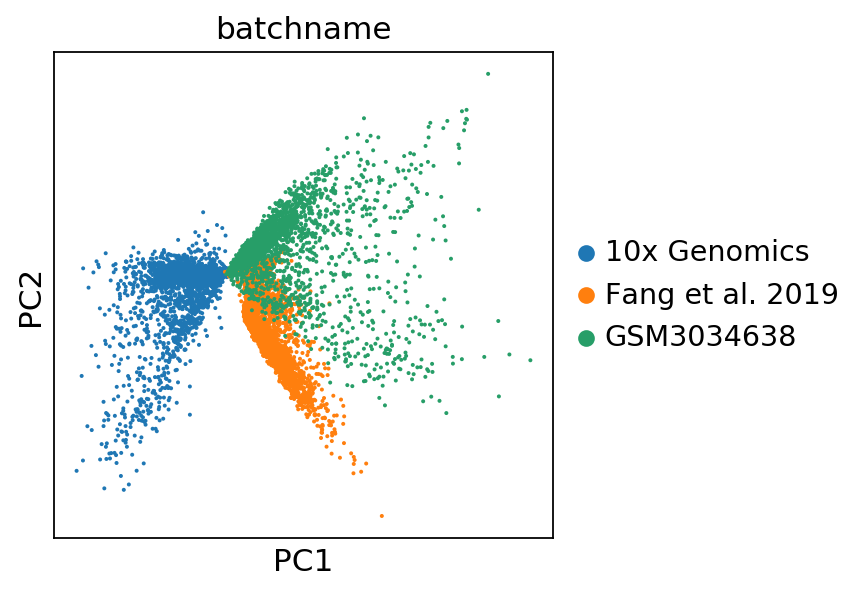

In [5]:
sc.pl.pca(adata,color='batchname')

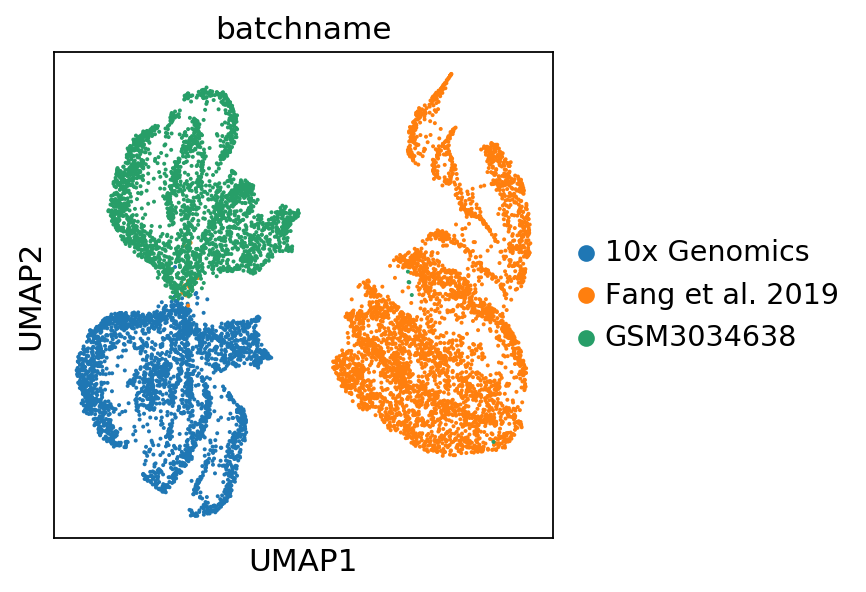

In [6]:
sc.pl.umap(adata,color='batchname')

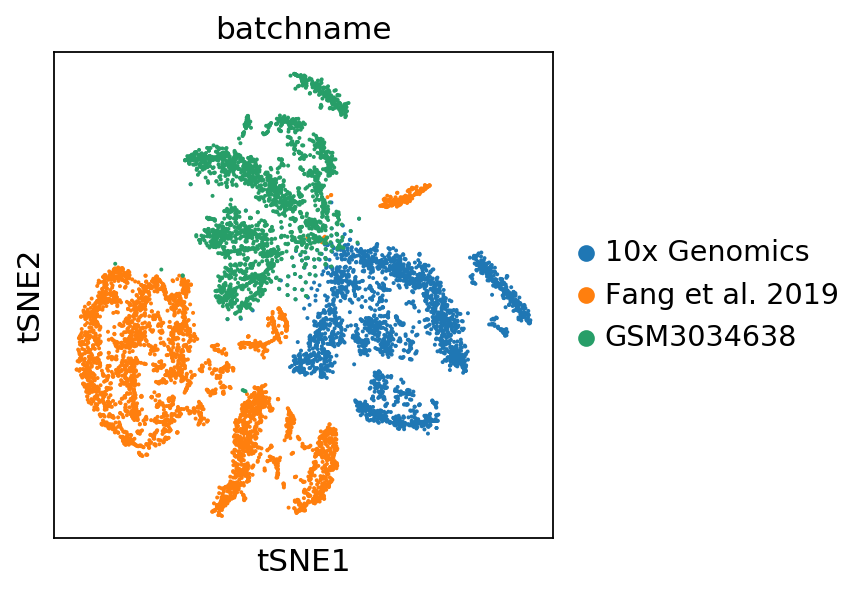

In [7]:
sc.pl.tsne(adata,color='batchname')

# Integration

In [8]:
res=scIB.integration.runHarmony(adata, batch='batch')

In [9]:
res

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes', 'counts'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'
    uns: 'batchname_colors', 'neighbors', 'pca', 'emb'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [10]:
foutput="../../data/brain_atac_3datasets/atac_brain_result_Harmony.pickle"

with open(foutput, 'wb') as handle:
    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# After integration

In [16]:
finput="../../data/brain_atac_3datasets/atac_brain_result_Harmony.pickle"
with open(finput, 'rb') as handle:
    integrated_res = pickle.load(handle)

In [17]:
#toplot = copy.copy(adata)
#toplot.obsm['X_pca'] = integrated_res

In [18]:
sc.pp.neighbors(integrated_res)
sc.tl.umap(integrated_res)
sc.tl.tsne(integrated_res)

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/icb/chaichoompu/.local/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/icb/chaichoompu/.local/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

Fi

In [19]:
integrated_res

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes', 'counts'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'
    uns: 'batchname_colors', 'neighbors', 'pca', 'emb'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

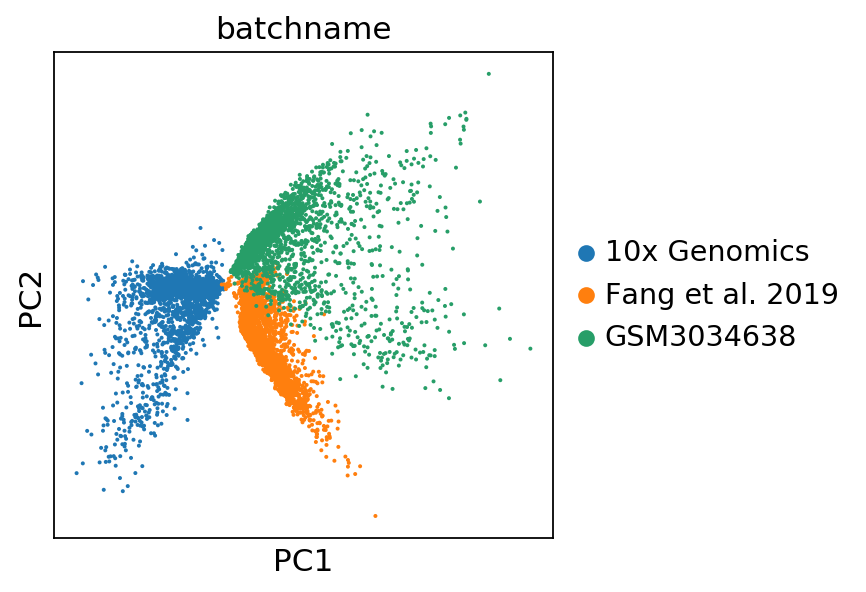

In [20]:
fplot="_brain_atac_after_integration_Harmony.pdf"
sc.pl.pca(integrated_res, color='batchname',save=fplot)

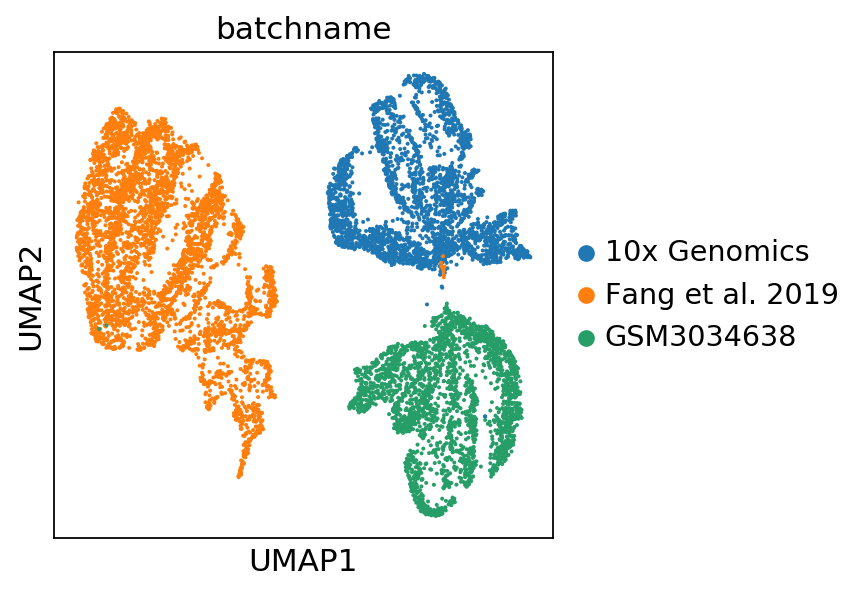

In [21]:
fplot="_brain_atac_after_integration_Harmony.pdf"
sc.pl.umap(integrated_res, color='batchname',save=fplot)

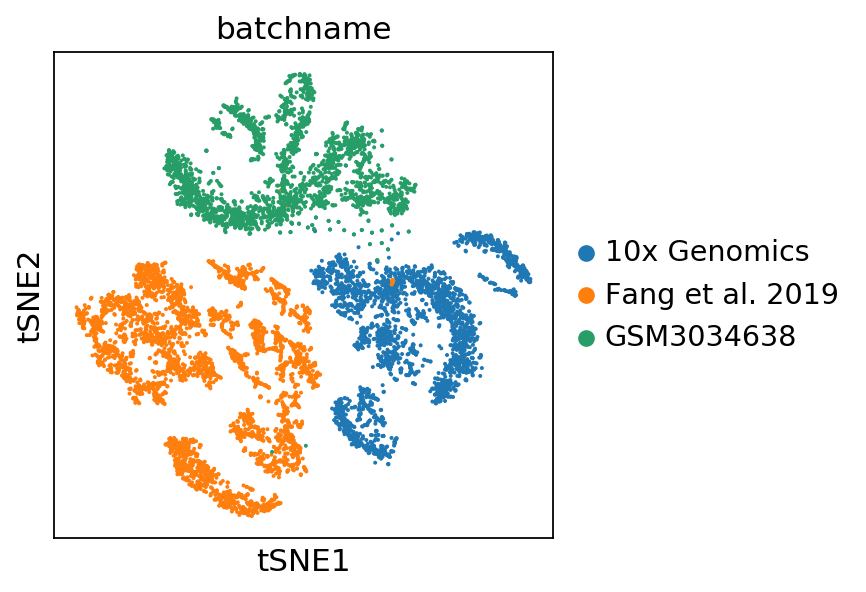

In [22]:
fplot="_brain_atac_after_integration_Harmony.pdf"
sc.pl.tsne(integrated_res, color='batchname',save=fplot)